### Data Science Capstone Project NanoDegree 


In [3]:
#Standard Imports  
import pandas as pd 
import numpy as np 

#Data Visualisation Imports 
import matplotlib.pyplot as plt
import seaborn as sns 

#### Load in the dataset 

In [7]:
train_df = pd.read_csv('train.csv')

In [5]:
print(train_df.shape,test_df.shape)

(381109, 12) (127037, 11)


In [6]:
#Showing head of the dataframe
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Combine Train and Test Data for visualisations 

In [8]:
train_df['type'] = 'train'
test_df['type'] = 'test'

combined_df = pd.concat([train_df, test_df])

#### Descriptive Statistics 

In [11]:
combined_df.describe().T.style.background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
id,762218.000000,190555.000000,110016.764039,1.000000,95278.000000,190555.000000,285832.000000,381109.000000
Age,762218.000000,38.822584,15.511601,20.000000,25.000000,36.000000,49.000000,85.000000
Driving_License,762218.000000,0.997869,0.046110,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,762218.000000,26.388807,13.229879,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,762218.000000,0.458210,0.498251,0.000000,0.000000,0.000000,1.000000,1.000000
Annual_Premium,762218.000000,30564.389581,17213.143765,2630.000000,24405.000000,31669.000000,39400.000000,540165.000000
Policy_Sales_Channel,762218.000000,112.034295,54.203959,1.000000,29.000000,133.000000,152.000000,163.000000
Vintage,762218.000000,154.347397,83.671249,10.000000,82.000000,154.000000,227.000000,299.000000
Response,762218.000000,0.122563,0.327936,0.000000,0.000000,0.000000,0.000000,1.000000


Convert Categoric columns to the correct datatype

In [13]:
combined_df[["Region_Code","Policy_Sales_Channel"]] = combined_df[["Region_Code","Policy_Sales_Channel"]].astype('int').astype("object")
train_df[["Region_Code","Policy_Sales_Channel"]] = train_df[["Region_Code","Policy_Sales_Channel"]].astype('int').astype("object")
test_df[["Region_Code","Policy_Sales_Channel"]] = test_df[["Region_Code","Policy_Sales_Channel"]].astype('int').astype("object")

#### Data quality checks 

In [10]:
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
type                    0
dtype: int64

In [11]:
train_df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
type                         1
dtype: int64

In [12]:
train_df.duplicated().value_counts()

False    381109
dtype: int64

In [13]:
test_df.duplicated().value_counts()

False    381109
dtype: int64

No nulls - no duplicates 

In [14]:
print(combined_df.info())
print()
print(combined_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762218 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    762218 non-null  int64  
 1   Gender                762218 non-null  object 
 2   Age                   762218 non-null  int64  
 3   Driving_License       762218 non-null  int64  
 4   Region_Code           762218 non-null  object 
 5   Previously_Insured    762218 non-null  int64  
 6   Vehicle_Age           762218 non-null  object 
 7   Vehicle_Damage        762218 non-null  object 
 8   Annual_Premium        762218 non-null  float64
 9   Policy_Sales_Channel  762218 non-null  object 
 10  Vintage               762218 non-null  int64  
 11  Response              762218 non-null  int64  
 12  type                  762218 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 81.4+ MB
None

id                      0
Gender        

#### Target Variable 

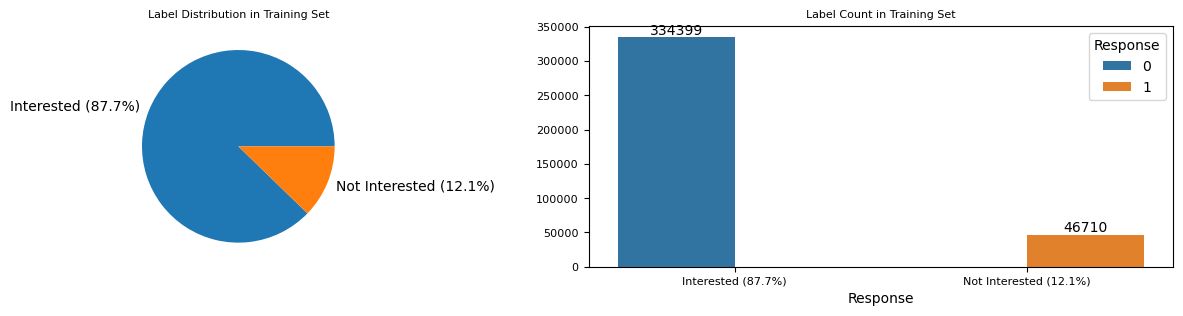

In [14]:
fig, axes = plt.subplots(ncols = 2, figsize = (13, 3), dpi = 100)
plt.tight_layout()

train_df.groupby('Response').count()['id'].plot(kind = 'pie', ax = axes[0], labels = ['Interested (87.7%)', 'Not Interested (12.1%)'])
res = sns.countplot(x = train_df['Response'], hue = train_df['Response'], ax = axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Interested (87.7%)', 'Not Interested (12.1%)'])
axes[0].tick_params(axis = 'x', labelsize = 8)
axes[0].tick_params(axis = 'y', labelsize = 8)
axes[1].tick_params(axis = 'x', labelsize = 8)
axes[1].tick_params(axis = 'y', labelsize = 8)

for container in res.containers:
    res.bar_label(container)

axes[0].set_title('Label Distribution in Training Set', fontsize = 8)
axes[1].set_title('Label Count in Training Set', fontsize =8)

plt.show()

Comment : 
We can observe that the target feature i.e whether a health insuance holder would be a vehicle insurance, is highly imbalanced, with 87% of health insurance holders not having purchased a vehicle insurance.

In [15]:
categorical_columns=[['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']]

#### Analyse the numeric features in the dataset 

In [16]:
numerical_cols = ['Age','Annual_Premium','Vintage']

In [17]:
combined_df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,762218.0,38.822584,15.511601,20.0,25.0,36.0,49.0,85.0
Annual_Premium,762218.0,30564.389581,17213.143765,2630.0,24405.0,31669.0,39400.0,540165.0
Vintage,762218.0,154.347397,83.671249,10.0,82.0,154.0,227.0,299.0


In [18]:
combined_df[numerical_cols].skew(axis=0).to_frame('Skewed Values')

,Skewed Values
Age,0.672538
Annual_Premium,1.766084
Vintage,0.003030


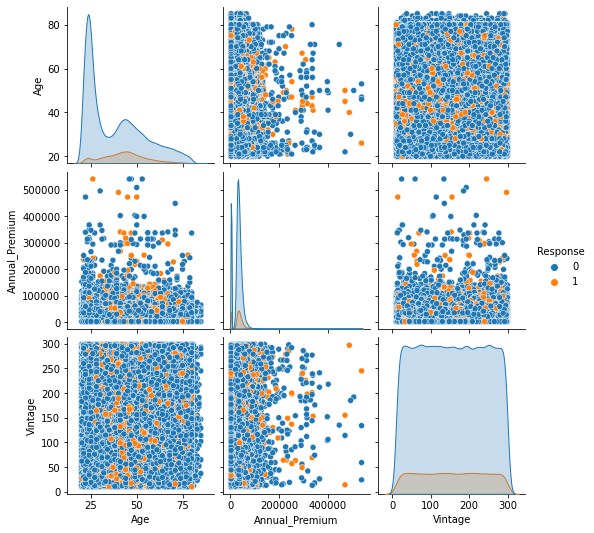

In [20]:
pp_plot_data = test_df.drop(['id','Gender', 'Vehicle_Damage', 'Vehicle_Age', 'Driving_License', 'Region_Code','Policy_Sales_Channel','Previously_Insured' ], axis =1)
sns.pairplot(pp_plot_data, hue="Response");


##### Feature : Age 

c:\dev\.conda\envs\jupyter-lab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


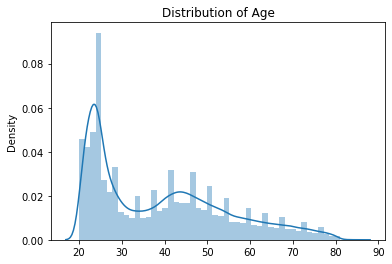

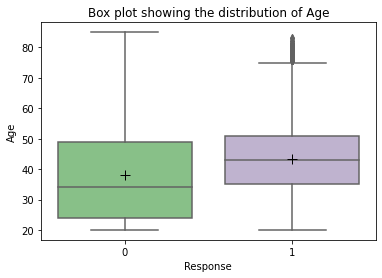

In [29]:
sns.distplot(x= combined_df.Age)
plt.title('Distribution of Age' )
plt.show() 

sns.boxplot(x=combined_df['Response'],
        y = combined_df['Age'], 
        data = combined_df,palette='Accent',
            showmeans=True,
                    meanprops={"marker": "+",
                        "markeredgecolor": "black",
                        "markersize": "10"})

plt.title('Box plot showing the distribution of Age' )
plt.show()


In [28]:
print(combined_df.groupby('Response')['Age'].describe())
print(combined_df.groupby('Response')['Age'].median())

             count       mean        std   min   25%   50%   75%   max
Response                                                              
0         668798.0  38.178227  15.816040  20.0  24.0  34.0  49.0  85.0
1          93420.0  43.435560  12.168859  20.0  35.0  43.0  51.0  83.0
Response
0    34.0
1    43.0
Name: Age, dtype: float64


c:\dev\.conda\envs\jupyter-lab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\dev\.conda\envs\jupyter-lab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


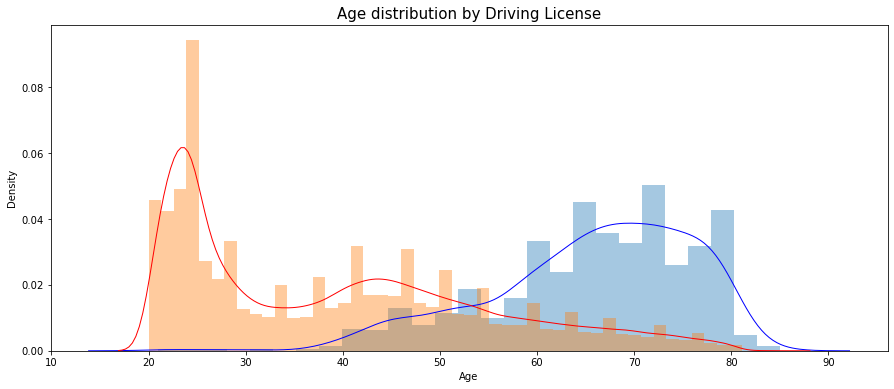

In [23]:
plt.figure(figsize = (15, 6))
sns.distplot(combined_df.loc[(combined_df['Driving_License'] == 0), 'Age'], kde_kws = {"color": "b", "lw": 1, "label": "Not Licensed for driving"})
sns.distplot(combined_df.loc[(combined_df['Driving_License'] == 1), 'Age'], kde_kws = {"color": "r", "lw": 1, "label": "Licensed for Driving"})
plt.title('Age distribution by Driving License', fontsize = 15)
plt.show()

Comment : 
- Most insurance holders are between 20-30. 
- The dist plot shows a slight bi-modal distribution - A larger number of holders found in the 40-50 years age bracket. 
- The mean and median age is higher for owners interested in vehicle insurance. 
   - Response variable 1 : { Mean : 43 , Median : 43 } , 0 : { Mean : 38 , Median : 43 } 
- People aged between 30-60 are most likely to be interested
- There are no outliers inthe dataset

<Figure size 576x432 with 0 Axes>

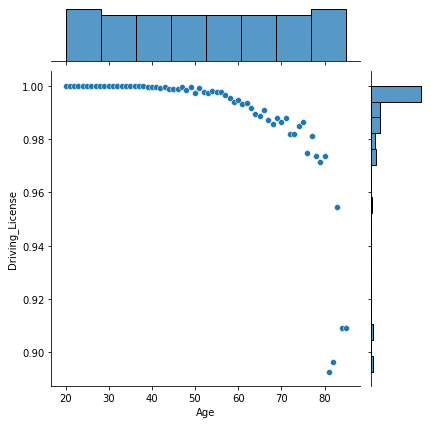

<Figure size 576x432 with 0 Axes>

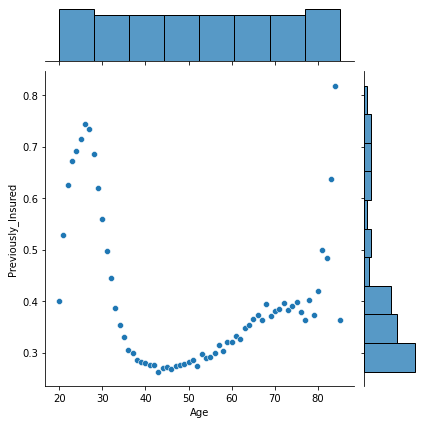

In [26]:
# Plotting jointplot of Age Vs driving license
plt.figure(figsize=(8,6))
sns.jointplot(x='Age', y='Driving_License', data=((combined_df[combined_df['Driving_License']==1]).groupby('Age')['Driving_License'].sum() / combined_df.groupby('Age')['Driving_License'].count()).reset_index());
plt.show()

plt.figure(figsize=(8,6))
sns.jointplot(x='Age', y='Previously_Insured', data=((combined_df[combined_df['Previously_Insured']==1]).groupby('Age')['Previously_Insured'].sum() / combined_df.groupby('Age')['Previously_Insured'].count()).reset_index());
plt.show()

##### Feature : Annual Premium 

c:\dev\.conda\envs\jupyter-lab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


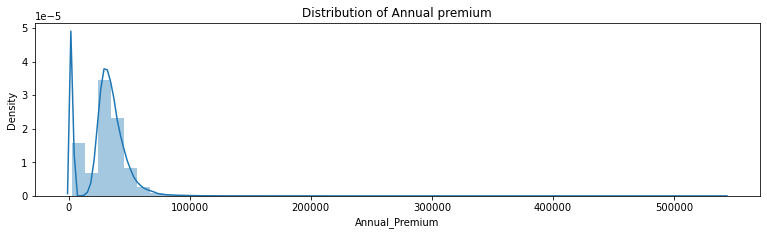

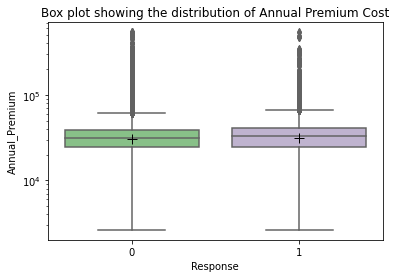

In [30]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(combined_df['Annual_Premium'])
plt.title("Distribution of Annual premium")
plt.show()

sns.boxplot(x=combined_df['Response'],
        y = combined_df['Annual_Premium'], 
        data = combined_df,palette='Accent',
            showmeans=True,
                    meanprops={"marker": "+",
                        "markeredgecolor": "black",
                        "markersize": "10"})

plt.title('Box plot showing the distribution of Annual Premium Cost' )
plt.semilogy()
plt.show()

In [32]:
print(combined_df.groupby('Response')['Annual_Premium'].median())
combined_df.groupby('Response')['Annual_Premium'].describe()

Response
0    31504.0
1    33002.0
Name: Annual_Premium, dtype: float64


,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,668798.0,30419.160276,16998.280489,2630.0,24351.0,31504.0,39120.0,540165.0
1,93420.0,31604.092742,18646.408239,2630.0,24868.0,33002.0,41297.0,540165.0


Comment : 
- Annual Premium is highly positively skewed to the right. With a skew value of 1.7. 
- There is a large range in Annual Premium of 537535.0
- The mean median price Insurance holders pay per annum is 31669.0
- Mean and Median Values are slighly high where the response variable = 1 
- The box plots show there are a large number of outliers for the annual premium.

##### Feature : Vintage

c:\dev\.conda\envs\jupyter-lab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


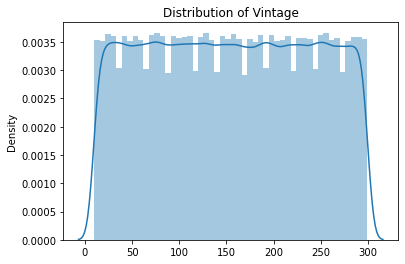

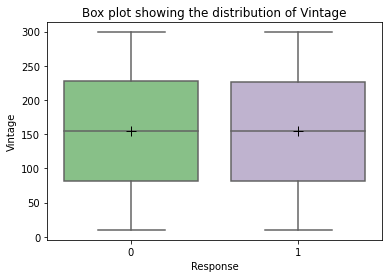

In [33]:
sns.distplot(x= combined_df.Vintage)
plt.title('Distribution of Vintage' )
plt.show()

sns.boxplot(x=combined_df['Response'],
        y = combined_df['Vintage'], 
        data = combined_df,palette='Accent',
            showmeans=True,
                    meanprops={"marker": "+",
                        "markeredgecolor": "black",
                        "markersize": "10"})

plt.title('Box plot showing the distribution of Vintage' )
plt.show()

#### Categorical Variables 

In [37]:
from dython.nominal import associations , identify_nominal_columns , cramers_v , theils_u

In [38]:
categorical_columns=train_df[['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']]

<AxesSubplot:>

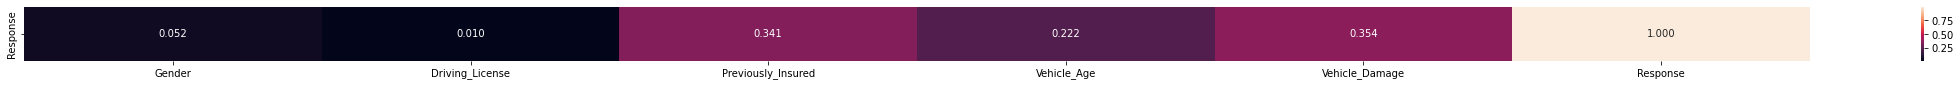

In [39]:
col = categorical_columns.columns
cramersV = pd.DataFrame(index=['Response'],columns=categorical_columns.columns)
for i in range(len(col)): 
    v = cramers_v(categorical_columns['Response'], categorical_columns[col[i]], bias_correction=True, nan_strategy='replace', nan_replace_value=0.0)
    cramersV.loc[:,col[i]] = v
    cramersV.astype(float)
plt.figure(figsize=(40,1))
sns.heatmap(cramersV,annot=True,fmt='.3f')

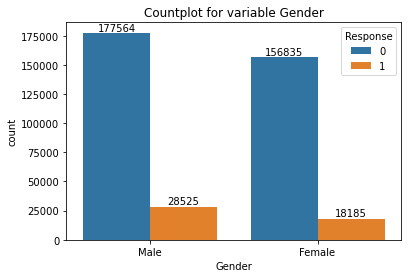

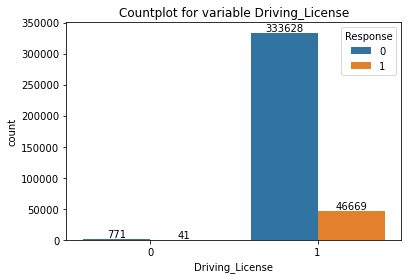

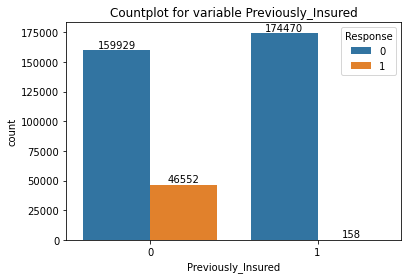

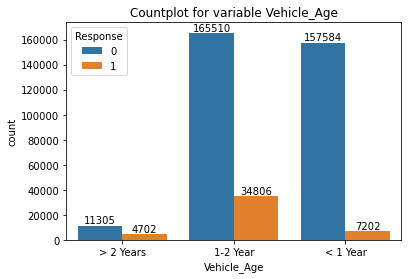

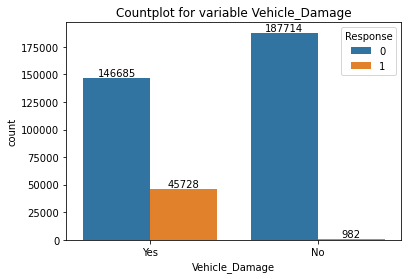

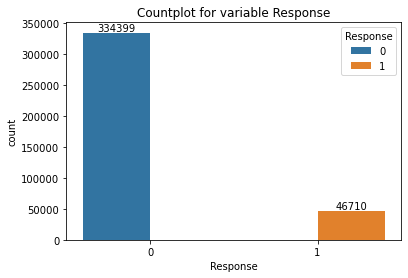

In [40]:
for i in col: 
    fig = sns.countplot(x=categorical_columns[i] , hue = categorical_columns['Response'])
    
    for container in fig.containers:
        fig.bar_label(container)
        
    plt.title('Countplot for variable {}'.format(i))
    plt.show()


Gender : 
    - The gender category is almost equal 
    - Men have a slightly higher chance of buying health insurance. 

Driving Licence 
    - Most customers in the dataset have a driving licence. 
    - Of the customers who are interested in vehicle insurance the majority have a driving licence. 

Previously Insured
    - Customers who are not previously insured are likely to be interested. 
    - Very few customers (158) who are previously insured are interested. 

Vehicle Age: 
    - Customers with vechicle age 1-2 years are more likely to interested as compared to the other two
    - Customers with with Vehicle_Age <1 years have very less chance of buying Insurance

To determine the optimal number of trees : I use early stopping. This stops building the algorithm when they no longer improve the model 

In [57]:
NOTE - Due to heavy imbalance in target classes, we need to give considerable importance to both precision and recall of class 1. Hence throughout the evaluation, we will focus on F1 score

We created 3 types of models - Probability, Tree based and boosting techniques.

SyntaxError: invalid syntax (2581408085.py, line 1)

In [58]:
LGBMClassifier

NameError: name 'LGBMClassifier' is not defined

In [59]:
y=train_df['Response'].astype(int)
x=train_df.drop(['Response'], axis = 1)

yt=test_df['Response'].astype(int)
xt=test_df.drop(['Response'], axis = 1)

In [60]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV

model_xgb = XGBClassifier()
model_xgb.fit(x, y)

pred_xgb = model_xgb.predict(xt) 
predictions_xgb = [round(value) for value in pred_xgb]
accuracy_xgb = accuracy_score(yt, predictions_xgb)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:Gender, Region_Code, Vehicle_Age, Vehicle_Damage, Policy_Sales_Channel, type

In [62]:
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
train_df['Gender'] = labelEncoder.fit_transform(train_df['Gender'])
train_df['Vehicle_Age'] = labelEncoder.fit_transform(train_df['Vehicle_Age'])
train_df['Vehicle_Damage'] = labelEncoder.fit_transform(train_df['Vehicle_Damage'])

In [64]:
train_df.dtypes


id                        int64
Gender                    int32
Age                       int64
Driving_License           int64
Region_Code              object
Previously_Insured        int64
Vehicle_Age               int32
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel     object
Vintage                   int64
Response                  int64
type                     object
dtype: object

In [65]:
x=train_df.drop(['Response'],axis=1)  
y=train_df['Response']

In [71]:
conda install imblearn


Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.




PackagesNotFoundError: The following packages are not available from current channels:

  - imblearn

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [70]:
from imblearn.under_sampling import RandomUnderSampler

ModuleNotFoundError: No module named 'imblearn'

In [69]:
train = RandomUnderSampler(random_state=42, replacement=True)
x_train, y_train = train.fit_resample(train_df.iloc[:,0:-1], data['Response'])


NameError: name 'RandomUnderSampler' is not defined

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=.30,random_state=0)

NameError: name 'x_train' is not defined